In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='DFKai-SB' #顯示中文

%matplotlib inline
#matplotlib 是python擴充的畫圖funtion，inline表示將圖表鑲嵌進netbook(不會在新視窗中呈現)
#%用於類似下terminal指令

In [2]:
# Load in the train datasets
train = pd.read_csv('data/train.csv', encoding = "utf-8", dtype = {'type': np.int32})
test = pd.read_csv('data/test.csv', encoding = "utf-8")
submission = pd.read_csv('data/submission.csv', encoding = "utf-8", dtype = {'type': np.int32})

# 查看資料
看欄位,資料類型,資料內容,資料大小

In [3]:
print('train.shape:')
print(train.shape)
print('train.keys:')
print(train.keys())
print('test.shape:')
print(test.shape)
print('test.keys:')
print(test.keys())

train.shape:
(123, 7)
train.keys:
Index(['id', '花萼長度', '花萼寬度', '花瓣長度', '花瓣寬度', '屬種', 'type'], dtype='object')
test.shape:
(30, 5)
test.keys:
Index(['id', '花萼長度', '花萼寬度', '花瓣長度', '花瓣寬度'], dtype='object')


In [4]:
train.head(5) #顯示前5筆資料

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1


In [5]:
test.head(5)

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


# One Hot Encoding
把"屬種"轉換成無序列類別

In [6]:
df1 = pd.get_dummies(train.iloc[:,5])
#df1 = pd.get_dummies(train['屬種'])   這種寫法也可以
df1.sample(5)

,Iris-new_type,Iris-setosa,Iris-versicolor,Iris-virginica
99,0,0,0,1
71,0,0,1,0
10,0,1,0,0
24,0,1,0,0
26,0,1,0,0


# Lable Encoding
把"屬性"轉換成有序列表<br>
在這個例子中用不到<br>
因為有序列表會讓feature有 <span style="color:red">強度性</span><br>
會影響模型的學習

In [7]:
df2 = train['屬種'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3,'Iris-new_type':4})
df2.sample(5)

88     3
101    3
109    3
85     3
77     2
Name: 屬種, dtype: int64

# Data clean - 缺值處理
1.先查看缺失筆數
2.查詢缺失筆數
3.刪除/填補缺失
4.填補的話,可以選擇平均數/眾數

In [8]:
#先看missing data
#如果missing data 占的比例不高 可以直接drop掉(<1%)
miss_sum = train.isnull().sum().sort_values(ascending=False)
miss_sum

花萼寬度    1
花萼長度    1
type    0
屬種      0
花瓣寬度    0
花瓣長度    0
id      0
dtype: int64

In [9]:
#查詢哪幾筆是空值
print(train[train.iloc[:,1].isnull()])
print("---------------------------------------")
print(train[train['花萼寬度'].isnull()])

      id  花萼長度  花萼寬度  花瓣長度  花瓣寬度             屬種  type
120  121   NaN   3.0   4.9   1.2  Iris-new_type     4
---------------------------------------
      id  花萼長度  花萼寬度  花瓣長度  花瓣寬度             屬種  type
121  122   5.2   NaN   5.1   1.8  Iris-new_type     4


In [10]:
#drop missing data
train_d_na = train.dropna().reset_index(drop=True) #drop完後 reset index
train_d_na.isnull().sum().sort_values(ascending=False)

type    0
屬種      0
花瓣寬度    0
花瓣長度    0
花萼寬度    0
花萼長度    0
id      0
dtype: int64

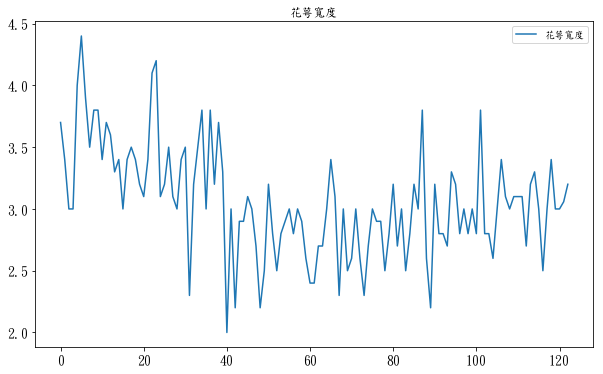

In [11]:
#補平均數
train[['花萼寬度']] = train[['花萼寬度']].fillna(np.mean(train[['花萼寬度']]))

train.plot(kind='line',y='花萼寬度',figsize=(10,6),fontsize=14,title='花萼寬度')

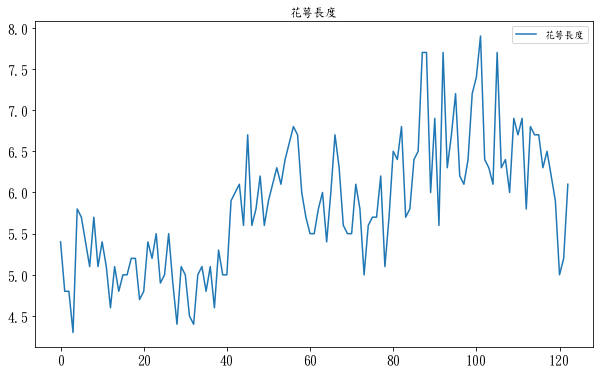

In [12]:
#補眾數
train[['花萼長度']] = train[['花萼長度']].fillna(train['花萼長度'].mode()[0]) #眾數可能有很多個，所以回傳的是陣列

train.plot(kind='line',y='花萼長度',figsize=(10,6),fontsize=14,title='花萼長度')

# 查看不同feature間的相關性

# 用corr

In [13]:
corr = train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']].corr()
print(corr)

          花瓣寬度      花瓣長度      花萼寬度      花萼長度
花瓣寬度  1.000000  0.958595 -0.367957  0.810219
花瓣長度  0.958595  1.000000 -0.436213  0.850649
花萼寬度 -0.367957 -0.436213  1.000000 -0.130174
花萼長度  0.810219  0.850649 -0.130174  1.000000


# 用sns繪製熱點圖

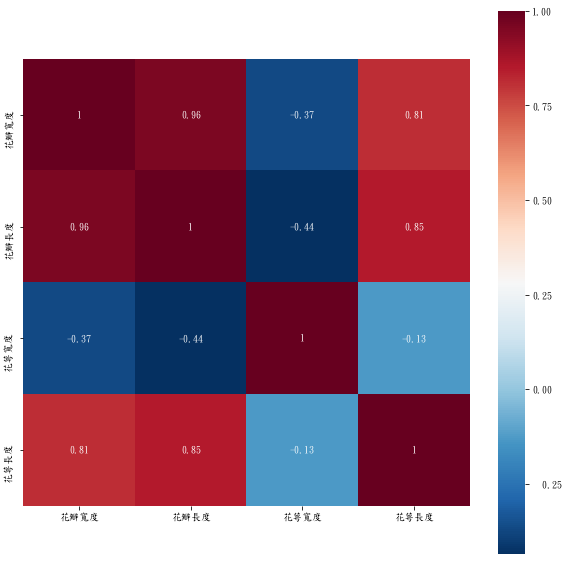

In [14]:
import seaborn as sns
plt.rcParams['font.family']='DFKai-SB' #顯示中文
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"
#sns.plt.show()

# http://seaborn.pydata.org/tutorial/color_palettes.html

# 用 scatter_matrlx 繪製散布圖

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019473693940>,
      dtype=object)

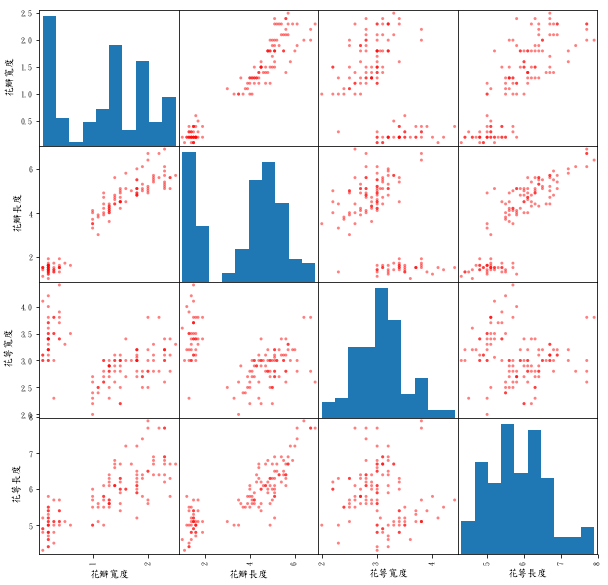

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix( train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']],figsize=(10, 10),color='r')

# 切分資料 (從官方的training data切分出來)

In [16]:
#把示範用的 type 4, 資料去除, 以免干擾建模#把示範用的
train = train[train['type']!=4]

X_train 是訓練用資料
Y_train 是訓練用的答案

In [26]:
from sklearn.model_selection import train_test_split

X = train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']]
y = train['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
print("X_train:")
print(X_train.sample(5))
print("----------------")
print("y_train:")
print(y_train.sample(5))

X_train:
    花瓣寬度  花瓣長度  花萼寬度  花萼長度
61   1.0   3.7   2.4   5.5
53   1.2   4.7   2.8   6.1
41   1.5   4.2   3.0   5.9
93   1.8   4.9   2.7   6.3
50   1.8   4.8   3.2   5.9
----------------
y_train:
7     1
20    1
4     1
16    1
48    2
Name: type, dtype: int32


# XGBoost演算法
!!!在機器上安裝這個套件!!!<br>
![用anaconda安裝套建](img/install.jpg)
利用這個演算法算不同feature的重要性<br>
XGBoost詳細說明:http://www.itread01.com/articles/1476146171.html

In [18]:
import xgboost as xgb
from sklearn import metrics

#n_estimators = 起始樹的種子
#max_depth = 每棵樹要分幾層
gbm = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4).fit(X_train, y_train)

print(metrics.classification_report(y_test, gbm.predict(X_test)))
print("Score:", gbm.score(X_test, y_test))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36

Score: 0.9722222222222222


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [19]:
print(gbm.feature_importances_)

[0.23069175 0.1608462  0.5305574  0.07790463]


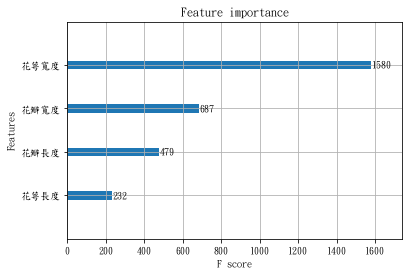

In [20]:
from xgboost import plot_importance
plot_importance(gbm, )
plt.show()

# 生成答案

In [21]:
pred = gbm.predict(test[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3])

# 寫入檔案

In [23]:
# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'id': submission.id, 'type': pred })
StackingSubmission.to_csv("submission.csv", index=False)
submission = pd.read_csv('submission.csv', encoding = "utf-8", dtype = {'type': np.int32})
submission

,id,type
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1
